# **Introduction**

In the dynamic landscape of Artificial Intelligence (AI), Large Language Models (LLMs) have emerged as extraordinary neural networks, wielding the transformative capabilities of the Transformer architecture. It all started with the paper "**[Attention Is All You Need](https://https://arxiv.org/abs/1706.03762)**".

These transformer models, exemplified by GPT and BERT, are not just cutting-edge innovations; they belong to a class of foundation models that redefine the boundaries of what AI can achieve. In this exploration, we delve into the fascinating world of LLMs and their astounding potential across various domains.

---





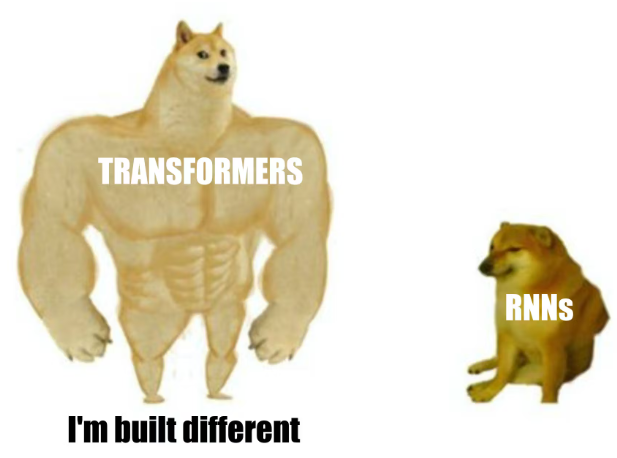

# **Contextual Understanding**

In Natural Language Processing (NLP), the journey to contextual understanding has been a fascinating saga marked by paradigm shifts and revolutionary breakthroughs. This evolution has transformed how we interact with machines and paved the way for Large Language Models (LLMs) with their remarkable capacity to comprehend language nuances.

### Evolution of NLP: A Transition from Rule-Based to Statistical Methods

The journey commences with the dawn of NLP, characterized by the rule-based systems that attempted to decode human language using predetermined sets of grammatical rules. While these early systems showcased promise, they faltered in the face of the intricate and dynamic nature of human communication. The transition from rule-based methods to statistical techniques marked a turning point. Statistical methods harnessed the power of data to decipher language patterns, but they too, faced limitations. The true challenge lay in understanding context—the delicate interplay of words, nuances, and meanings that shape our conversations.

### Limitations of Traditional NLP Approaches: The Context Conundrum

As NLP evolved, it became evident that traditional methods struggled to grasp the intricacies of context and meaning. Language is a tapestry woven from diverse threads—each word carrying its own significance, but their collective essence often transcends the sum of their parts. Traditional models, unable to unravel this intricacy, could inadvertently misinterpret and misrepresent intended meanings. Contextual nuances, double entendres, and cultural references remained elusive to these models, highlighting the need for a groundbreaking approach.

### Embarkation of Embeddings: The Dawn of Contextualized Representation

In this backdrop, embeddings emerged as a beacon of hope—a concept that would redefine how machines comprehend language. At its core, embeddings encapsulate the essence of words and phrases in a multi-dimensional space, encoding semantic relationships between them. Unlike traditional methods that viewed words in isolation, embeddings unlocked the potential to capture context by considering how words interact in sentences and paragraphs.

### The Power of Embeddings: Contextualized Representation Unleashed
Imagine words as puzzle pieces, and sentences as intricate mosaics. Embeddings provide the glue that binds these pieces together, enabling a more holistic comprehension. Through techniques like Word2Vec, GloVe, and FastText, words were transformed into vectors in a space where proximity denoted similarity and relationships conveyed meaning. This innovation transcended individual words, empowering models to decipher sentiment, recognize entities, and even perform language translation with greater accuracy.

As we navigate the journey from rule-based beginnings to the era of embeddings, we witness a narrative arc that mirrors human understanding—evolving from simplistic interpretations to nuanced context comprehension. The rise of LLMs like GPT-3, which build upon these contextual representations, signals the culmination of this odyssey—a journey that places the power of context at the forefront of AI's ability to decipher the intricate tapestry of human language.

---


# **Embeddings**

In the intricate realm of Natural Language Processing (NLP), embeddings emerge as the cornerstone concept, wielding the power to bridge the gap between human language and machine comprehension. These dense vector representations, encapsulating the essence of words and sentences, lay the foundation for unraveling language's semantic and syntactic mysteries. Let's dive into embeddings, exploring their variations, real-world significance, and a myriad of applications that have transformed the landscape of NLP.

### **Use-cases of Embeddings**

With embeddings, you can perform various arithmetic operations to carry out specific tasks:

**Word similarity**:

You can compare the embeddings of two words to understand their similarity. This is often done using cosine similarity, a metric that measures the cosine of the angle between two vectors. A higher cosine similarity between two word vectors indicates that the words are more similar in terms of their usage or meaning.

**Word analogy**:

Vector arithmetic can be used to solve word analogy tasks. For example, given the analogy task “man is to woman as king is to what?”, we can find the answer (queen) by performing the following operation on the word embeddings: “king” - “man” + “woman”.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/Word_vector_illustration.jpg", width = 400 />
</div>

**Sentence similarity**:

If you want to measure the similarity between two sentences, you could use the embedding of the special Class token produced by models like BERT, which is designed to capture the aggregate meaning of the sentence. Alternatively, you could average the embeddings of all tokens in each sentence and compare these average vectors. Note that when it comes to sentence-level tasks like sentence similarity, Sentence-BERT (SBERT), a modification of the BERT model, is often a better choice. SBERT is specifically trained to produce sentence embeddings that are directly comparable in semantic space, which generally leads to better performance on sentence-level tasks. In SBERT, both sentences are fed into the model simultaneously, allowing it to understand the context of each sentence in relation to the other, resulting in more accurate sentence embeddings.

# How Do LLMs Work?
* Like we discussed in the Introduction section, LLMs are trained to predict the next token based on the set of previous tokens. They do this in an autoregressive manner (where the current generated token is fed back into the LLM as input to generate the next one), enabling generation capabilities.
* The first step involves taking the prompt they receive, tokenining it, and converting it into embeddings, which are vector representations of the input text. Note that these embeddings are initialized randomly and learned during the course of model training, and represent a non-contextualized vector form of the input token.
* Next, they do layer-by-layer attention and feed-forward computations, eventually assigning a number or logit to each word in its vocabulary (in the case of a decoder model like GPT-N, LLaMA, etc.) or outputs these features as contextualized embeddings (in the case of an encoder model like BERT and its variants such as RoBERTa, ELECTRA, etc.).
* Finally, in the case of decoder models, the next step is converting each (unnormalized) logit into a (normalized) probability distribution (via the Softmax function), determining which word shall come next in the text.

# LLM Training Steps
At a top-level, here are steps involved in training LLMs:
1. **Corpus Preparation**: Gather a large corpus of text data, such as news articles, social media posts, or web documents.

2. **Tokenization**: Split the text into individual words or subword units, known as tokens.

3. **Embdedding Generation**: Typically accomplished using a randomly initialized embedding table, via the `nn.Embedding` class in PyTorch. Pre-trained embeddings such Word2Vec, GloVe, FastText, etc. can also be used as a starting point for training. Note that these embeddings represent the non-contextualized vector form of the input token.

4. **Neural Network Training**: Train a neural network model on the input tokens.
* For encoder models such as BERT and its variants, the model learns to predict the context (surrounding words) of a given word which are masked. BERT is specifically trained on the Masked Language Modeling task (known as the Cloze task) and the Next Sentence Prediction objective; described in our BERT primer.

* For decoder models such as GPT-N, LLaMA, etc., the model learns to predict the next token in the sequence, given the prior context of tokens.






Let's build a GPT model from scratch based on the attention mechanism explained in the paper "**[Attention Is All You Need](https://https://arxiv.org/abs/1706.03762)**"

# Importing dependencies


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Defining Hyperparameters

`batch_size`: Determines the number of input sequences processed in each training iteration.

`block_size`: Defines the length of the input sequence, which is crucial for handling positional information.

`n_embd`: Specifies the size of the token embeddings and hidden states.

`n_head`: Determines the number of attention heads in the multi-head attention mechanism.

`n_layer`: Specifies the number of layers in the GPT model.

`dropout`: Introduces a dropout rate to prevent overfitting during training.
learning_rate: Governs the step size during optimization.

In [ ]:
# Replace these hyperparameters with your desired values

batch_size = 64 # how many independent sequences will we process in parallel?

block_size = 32 # what is the maximum context length for predictions?

# Total number of training iterations.
max_iters = 1000

# Interval at which to perform evaluation (in terms of iterations).
eval_interval = 100

# Learning rate for the optimization algorithm (e.g., Adam).
learning_rate = 1e-3

# Number of evaluation iterations during validation.
eval_iters = 200

# Embedding dimension for tokens in the model.
n_embd = 64

# Number of attention heads in the model's multi-head attention mechanism.
n_head = 6

# Number of layers in the model.
n_layer = 6

# Dropout rate, a regularization technique to prevent overfitting.
dropout = 0.0

# Loading and Preprocessing the dataset

In [ ]:

# Load your own dataset here
!wget https://github.com/Dushyantm/data/blob/main/all_season_script.txt
with open('all_season_script.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# create a mapping from characters to integers
#Two dictionaries, stoi and itos, are created to map characters to indices and vice versa.
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

--2023-08-18 17:49:47--  https://github.com/Dushyantm/data/blob/main/all_season_script.txt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4104 (4.0K) [text/plain]
Saving to: ‘all_season_script.txt.1’

all_season_script.t 100%[===================>]   4.01K  --.-KB/s    in 0s      

2023-08-18 17:49:47 (70.0 MB/s) - ‘all_season_script.txt.1’ saved [4104/4104]

cuda


In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print("Vocab built from the inputed text:")
print(''.join(chars), vocab_size)

word_to_token = {word: idx for idx, word in enumerate(chars)}
token_to_word = {idx: word for idx, word in enumerate(chars)}

encode = lambda s:[word_to_token[c] for c in s]
decode = lambda l:''.join([token_to_word[i] for i in l])

print("Input String:",decode(encode('hello there')))
print("Encoded into Integers:",encode('hello there'))

Vocab built from the inputed text:
 "%,-./0123456789:=?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz{}· 78
Input String: hello there
Encoded into Integers: [56, 53, 60, 60, 63, 0, 68, 56, 53, 66, 53]


In [ ]:
# Train and val splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
   # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i + block_size] for i in ix])
    y = torch.stack([data[i + 1:i + block_size + 1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y


In [ ]:
# The model computes logits and loss using the provided input and target sequences.
# The loss value is recorded and averaged across iterations for each split.
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

# Building the Attention Head



 The Head class encapsulates the core components of a single attention head in the Transformer architecture.

 * It performs key, query, and value linear transformations, computes scaled dot-product attention with masking, applies softmax, and outputs the attended values.

 * This attention head is an essential building block that captures relationships between tokens in the input sequence, enabling the model to capture context and dependencies

 * The issue with Self-Attention is that nothing is being trained. But if we add some trainable parameters, teh network can then learn some patterns which give much better context. These trainable parameters can be a matrix whose values are trained. So the idea of Query, Key and Values was introduced.

In [ ]:
torch.manual_seed(1337)

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        # where B is the batch size, T is the sequence length, and C is the number of classes (vocab size).
        # print("Shape of B,T,C", x.shape)
        k = self.key(x)
        q = self.query(x)
        wei = q @ k.transpose(-2, -1) * k.shape[-1] ** -0.5
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        v = self.value(x)
        out = wei @ v
        return out

In [ ]:
from numpy.core.multiarray import dtype
import numpy as np
temp = torch.from_numpy(np.random.rand(64,32,64).astype('f'))

In [ ]:
model = Head(head_size=1)
print(model(temp)[0])

tensor([[0.2958],
        [0.3797],
        [0.3507],
        [0.3383],
        [0.3814],
        [0.3914],
        [0.3661],
        [0.3770],
        [0.4243],
        [0.3995],
        [0.3976],
        [0.4119],
        [0.4080],
        [0.3930],
        [0.4084],
        [0.4056],
        [0.4234],
        [0.4096],
        [0.4101],
        [0.4001],
        [0.3948],
        [0.3866],
        [0.3874],
        [0.3850],
        [0.3870],
        [0.3884],
        [0.3658],
        [0.3700],
        [0.3611],
        [0.3595],
        [0.3658],
        [0.3591]], grad_fn=<SelectBackward0>)


# Multi-Head Attention Mechanism
The concept of multi-head attention enhances the model's ability to capture different types of relationships within the input sequence. The MultiHeadAttention class brings together multiple Head instances

The MultiHeadAttention class orchestrates the following:

* It contains multiple instances of the Head class, each capturing different patterns in the data.
* The outputs from all attention heads are concatenated and projected back to the original embedding dimension using the proj linear layer.

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out




The architecture allows the model to capture complex relationships and patterns in the data.


In [ ]:
class FeedFoward(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

## The Transformer Block

In [ ]:
class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# GPT Language Model Architecture

The GPTLanguageModel class brings everything together to form the GPT architecture. It includes token and position embeddings, multiple Transformer blocks, layer normalization, and a linear projection for generating text:

`targets` represents the ground truth target sequence, where each element is the index of the corresponding token in the sequence.

`logits` are the model's predictions for each token in the sequence, before applying the softmax function.

In [ ]:
class GPTLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)

        self.apply(self._init_weights)

    # Weight Initialization
    # The method initializes linear layers with a normal distribution having a mean of 0 and a standard deviation of 0.02.
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))
        x = tok_emb + pos_emb
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            # The logits tensor is reshaped to have dimensions (B * T, C),
            # where B is the batch size, T is the sequence length, and C is the number of classes (vocab size).
            # Similarly, the targets tensor is reshaped to have dimensions (B * T) to match the reshaped logits.
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Model Training

Now that we have defined the GPT architecture, let's delve into the process of training the model. Below is an outline of the training process:

In [ ]:
model = GPTLanguageModel()
m = model.to(device)
print(sum(p.numel() for p in m.parameters()) / 1e6, 'M parameters')

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.3f}, val loss {losses['val']:.3f}")

    optimizer.zero_grad()
    X, Y = get_batch('train')
    logits, loss = model(X, Y)
    loss.backward()
    optimizer.step()

0.304846 M parameters
step 0: train loss 4.393, val loss 4.394
step 100: train loss 2.049, val loss 3.880
step 200: train loss 0.754, val loss 4.590
step 300: train loss 0.410, val loss 5.288
step 400: train loss 0.303, val loss 5.728
step 500: train loss 0.258, val loss 6.029
step 600: train loss 0.234, val loss 6.389
step 700: train loss 0.220, val loss 6.466
step 800: train loss 0.204, val loss 6.597
step 900: train loss 0.214, val loss 6.769
step 999: train loss 0.195, val loss 6.813


In [ ]:
# Save the model
torch.save(model.state_dict(), 'gpt_language_model.pth')

# Text Generation

One of the exciting features of GPT models is their ability to generate coherent text. Here's how you can generate text using your trained GPT model:

The `generate` function takes the trained model, a seed text, and the desired number of new tokens to generate.
It converts the seed text to tensor format, feeds it to the model, and generates additional tokens using the `generate` method.
The generated sequence is then converted back to text using your chosen tokenizer.

In [ ]:
# Load the model
loaded_model = GPTLanguageModel()
loaded_model.load_state_dict(torch.load('gpt_language_model.pth'))
loaded_model = loaded_model.to(device)

# Text generation
seed_text = "arya stark: I want to meet Ned"
idx = torch.tensor([encode(seed_text)], dtype=torch.long, device=device)
generated_text = decode(loaded_model.generate(idx, max_new_tokens=3000)[0].tolist())
print(generated_text)

arya stark: I want to meet Ned cwith trustitains.o Conce that now?
tyrion lanning there's rights ride.
branginer: No still be her woined shum the ople apt brother? I Turms cour befing for his Weanterfell, you killed. If bow. You be thats have by we anotned runer. I thouse I brother whilking's about doobsing him.
tyrion lannister: Bun, what do brot.
stannis betuner: Seep her beat.
tyrion lannister: If wit nall the King's that her.
petyr rune: I was herd one? You find me into be his only sorrim tery south thed, tell be the Brother rememben. No see real. If to! I was he you've now. Stopp ducking the going a preptet of the ceple That feel, tong,-- can't trust by meery hildly.
oborrah mormont: Do you've cream for anymor.
catelyn stark: Send how share?
ser celten. Every wrild the swined Prost morrich,. Corive you shand to to at casting. And to knighter?
talisand: Wights to Loved slighnes.
tywin lannister: I aurrest Sansa why bunfuls pituntitate finder.
bronn: I You are the runy a nertying ho